# GDP, life expectancy and their relationship
## 1. Preparing the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math


data_file = pd.read_csv('all_data.csv')
print('###DataFrame info:')
print(data_file.info())
print('''###############################################
####DataFrame sample:''')
print(data_file.head())




###DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
###############################################
####DataFrame sample:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                             

In [4]:
#Renaming the life expectancy column to make it usable as an attribute
data_file.rename(columns = {'Life expectancy at birth (years)':'Life'}, inplace = True)

#Working out GDP values by dividing them by 1,000,000,000 for more readable presentation
data_file.GDP = data_file['GDP'].apply(lambda x: round((x / 1000000000),4))

#Checking the data after modifications:
print(data_file.head())

#Checking the list of countries
print(data_file.Country.unique())

  Country  Year  Life      GDP
0   Chile  2000  77.3  77.8609
1   Chile  2001  77.3  70.9799
2   Chile  2002  77.8  69.7368
3   Chile  2003  77.9  75.6435
4   Chile  2004  78.0  99.2104
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## 2. Data Distribution

### 2.1 GDP

Exploring the GDP value distribution and the shape of the dataset: the distribution of values is right-skewed with 50% of the values falling under approximately 5000 bln dollars. It is also apparent that China and USA have a relatively wide range of values, while the remaining countries - especially Zimbabwe and Chile - have a very narrow range of GDP values reported in the dataset.

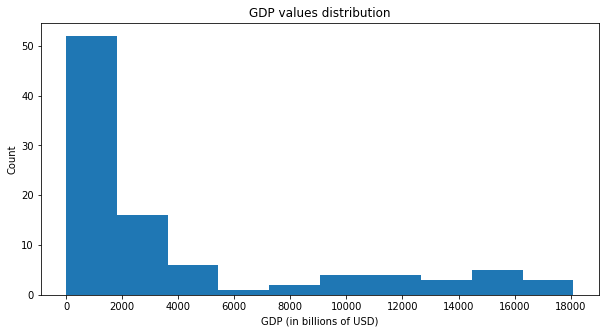

<Figure size 432x288 with 0 Axes>

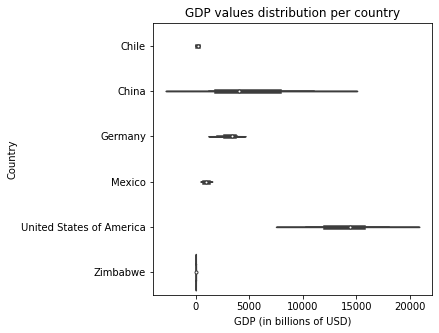

<Figure size 432x288 with 0 Axes>

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(data_file['GDP'], bins=10)
plt.title('GDP values distribution')
plt.xlabel('GDP (in billions of USD)')
plt.ylabel('Count')
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(x='GDP', y='Country', data = data_file)
plt.title('GDP values distribution per country')
plt.xlabel('GDP (in billions of USD)')
plt.show()
plt.clf()

### 2.2 Life Expectancy

Exploring the life expectancy value distribution and the general shape of the dataset: the values are left-skewed with majority of values falling above 70 years. The widest range of values is represented by data from Zimbabwe, while the other countries' ranges are comparatively narrow.

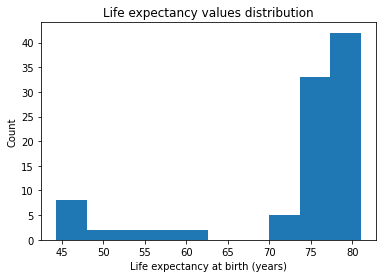

<Figure size 432x288 with 0 Axes>

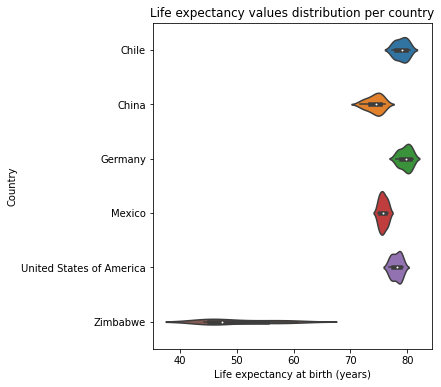

<Figure size 432x288 with 0 Axes>

In [46]:
plt.hist(data_file['Life'])
plt.title('Life expectancy values distribution')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Count')
plt.show()
plt.clf()


fig, ax = plt.subplots(figsize=(5,6))
sns.violinplot(x='Life', y='Country', data = data_file)
plt.title('Life expectancy values distribution per country')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.clf()

## 3. Averages

The mean values per country data can be found in the table below.

In [87]:
dfMeans = data_file.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfMeans)

                    Country      Life           GDP
0                     Chile  78.94375    169.788844
1                     China  74.26250   4957.713750
2                   Germany  79.65625   3094.775625
3                    Mexico  75.71875    976.650625
4  United States of America  78.06250  14075.000000
5                  Zimbabwe  50.09375      9.062594


### 3.1 GDP

Looking at mean GDP values per country we can see large variation of results: with USA's mean GDP being more than two times higher than China's mean GDP, which is second to USA's. Zimbabwe's mean GDP is so low (9.06 bln dollars), it is not visible on the chart.

Text(0.5, 1.0, 'Mean GDP per country')

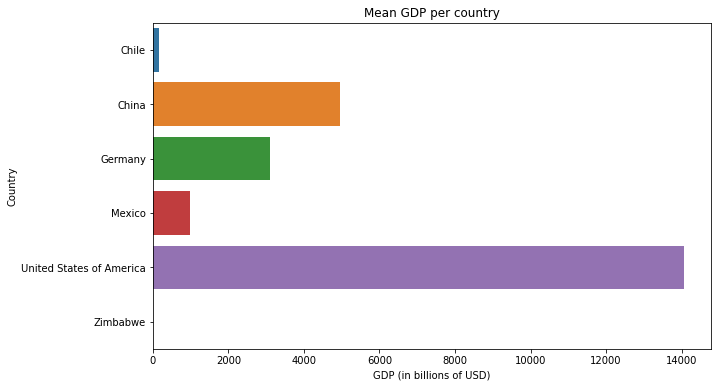

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP (in billions of USD)")
plt.title('Mean GDP per country')

### 3.2 Life Expectancy

As was already visible in "Life expectancy values distribution per country" chart from 2.2, the life expectancy values are not as varied as GDP, with the exception of Zimbabwe, whose life expectancy values are significantly lower than in the rest of the countries. This is also visible when examining countries' mean life expectancies on the chart below.

Text(0.5, 1.0, 'Mean life expectancy per country')

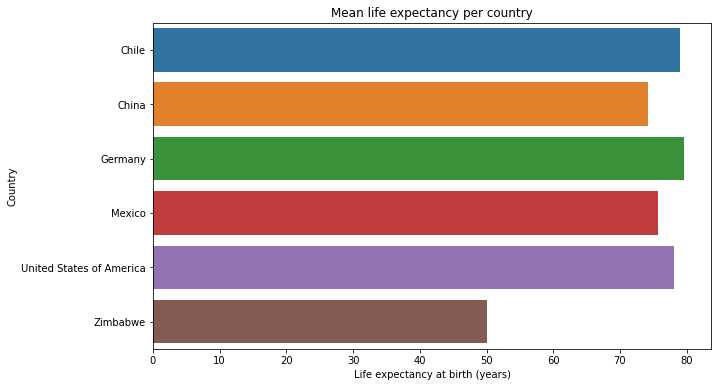

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x="Life", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)")
plt.title('Mean life expectancy per country')

## 4. Trends over time

### 4.1 GDP

The GDP values appear to be positively correlated with time. The chart below presents the GDP over time trends for all countries. The GDP values differ considerably between the countries, making it difficult to see the trend for Zimbabwe and Chile, which have the lowest GDP values.

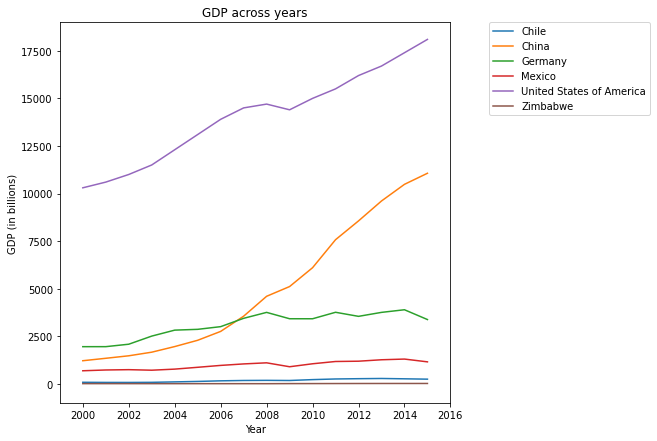

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=[7,7])
for i in data_file.Country.unique():
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.1, 1),loc='upper left', borderaxespad=0.) 
plt.axis([1999,2016,-1000,19000])
plt.title("GDP across years")
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.show()
plt.clf()

The below charts make the observation of individual trends easier. Despite a positive correlation between time and GDP, there are individual cases where GDP drops - especially in Chile and Mexico. Germany's positive correlation has become less apparent after 2007.

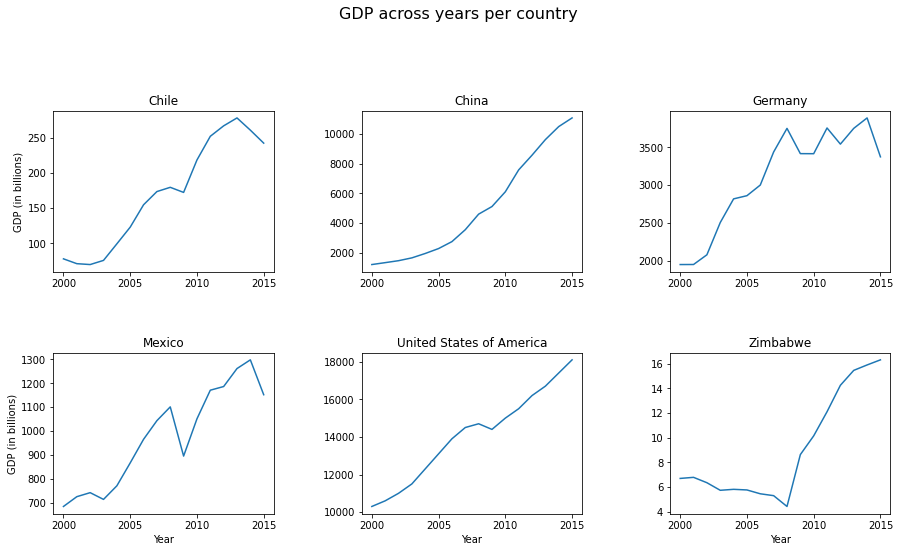

<Figure size 432x288 with 0 Axes>

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('GDP across years per country', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    yvalues= data_file['GDP'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
    plt.title(i)
    if counter in (1, 4):
        plt.ylabel('GDP (in billions)')
    if counter in (4, 5, 6):
        plt.xlabel('Year')
    
    ax.set_xticks([2000,2005,2010,2015])
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

### 4.2 Life Expectancy

The life expectancy values appear to be positively correlated with time. The chart below presents the life expectancy over time trends for all countries. With the exception of Zimbabwe, there is little variation in countries' life expectancy over time, as their life expectancy grows steadily through time. Zimbabwe has a significantly lower life expectancy, but has experienced a clear positive trend since 2004 and thus has been reducing the difference between itself and the rest of the countries.

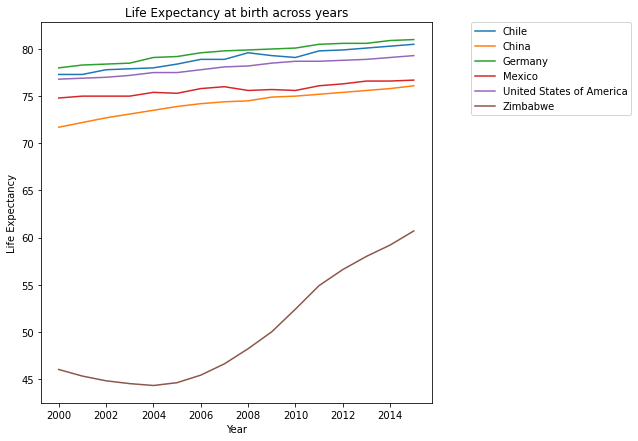

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=[7,7])
for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)

plt.legend(data_file.Country.unique(), bbox_to_anchor=(1.1, 1),loc='upper left', borderaxespad=0.) 
plt.title("Life Expectancy at birth across years")
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()
plt.clf()

When exploring the trends over time per country, the observation of the positive time/life expectancy correlation is reinforced. Similarly to the GDP trends, Mexico and Chile experienced a temporary drop of the life expectancy around 2010. This implies a strong correlation between GDP and life expectancy, which will be discussed in more detail in further chapters of this project.

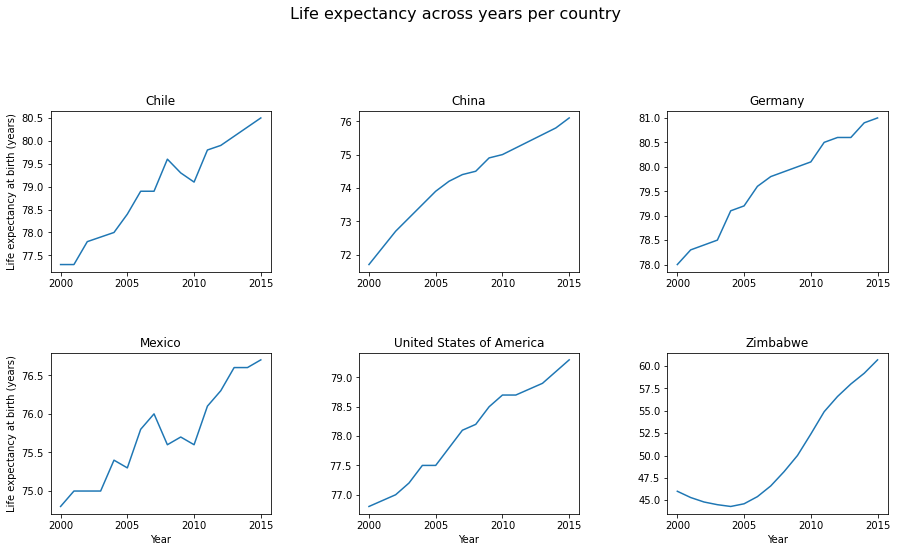

<Figure size 432x288 with 0 Axes>

In [79]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Life expectancy across years per country', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['Year'][data_file['Country']==i]
    plt.plot(xvalues, yvalues)
    plt.title(i)
    ax.set_xticks([2000,2005,2010,2015])
    if counter in (1, 4):
        plt.ylabel('Life expectancy at birth (years)')
    if counter in (4, 5, 6):
        plt.xlabel('Year')
plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()

## 5. Linear relationship between GDP and Life Expectancy

### 5.1 First look

The plot below attempts to consolidate the data for all countries and present the relationship between Life Expectancy and GDP.
What becomes immediately evident is that there is a significant discrepancy between each country's GDP, which consequently fails any attempt to draw a linear correlation between GDP and Life Expectancy when analyzing the data from all countries at once.

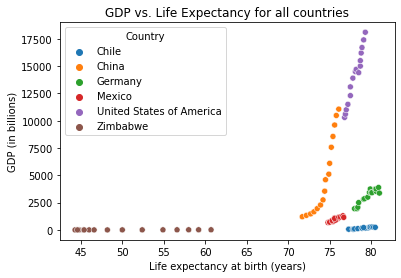

<Figure size 432x288 with 0 Axes>

In [111]:
sns.scatterplot(y = 'GDP', x = 'Life', data = data_file, hue = 'Country')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP (in billions)')
plt.title('GDP vs. Life Expectancy for all countries')
plt.show()
plt.clf()

Given the above findings, we decided to approach each country's data separately and try to draw conclusions for individual countries in the charts below. Now it is much more evident that the relationship between country's GDP and Life Expectancy is positively correlated.

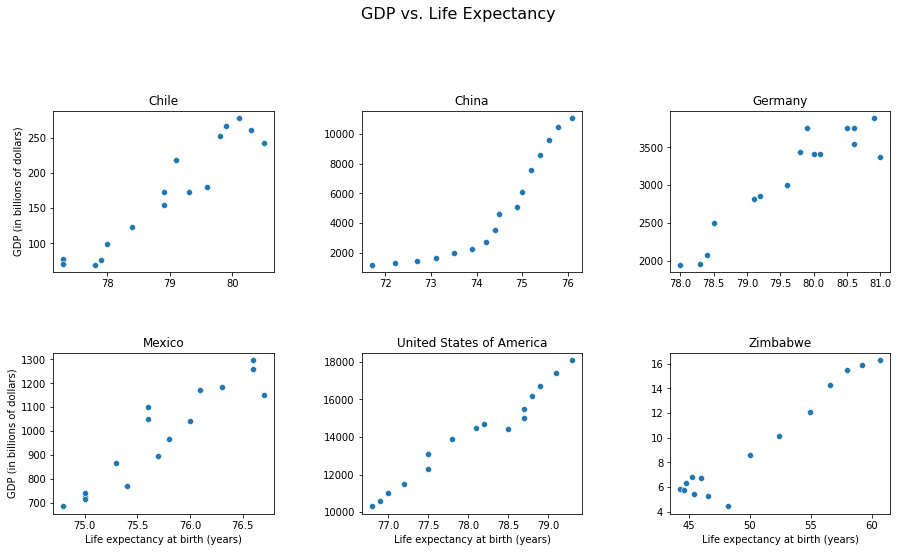

<Figure size 432x288 with 0 Axes>

In [128]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('GDP vs. Life Expectancy', size=16)
counter = 0
for i in data_file.Country.unique():
    counter += 1
    ax = plt.subplot(2,3,counter)
    sns.scatterplot(y = 'GDP', x = 'Life', data = data_file[data_file['Country']==i])
    plt.title(i)
    if counter in (1, 4):
        plt.ylabel('GDP (in billions of dollars)')
    else:
        plt.ylabel('')
    if counter in (4, 5, 6):
        plt.xlabel('Life expectancy at birth (years)')
    else:
        plt.xlabel('')

plt.subplots_adjust(hspace = 0.5, wspace = 0.4, bottom = 0.1, top = 0.8)
plt.show()
plt.clf()





### 5.2 Quantifying correlation using Pearson's coefficient

To double check the relationship between GDP and Life Expectancy in a given country is positively correlated, Pearson's coefficient can be used to quantify that correlation.

In [131]:
for i in data_file.Country.unique():
    yvalues= data_file['Life'][data_file['Country']==i]
    xvalues= data_file['GDP'][data_file['Country']==i]
    corr = np.corrcoef(xvalues, yvalues)
    corr = corr[1,0]
    if corr < 0:
        direction = 'negative'
    elif corr > 0:
        direction = 'positive'
    else:
        direction = 'undetermined'
    
    corr = abs(corr)
    
    if corr > 0.8:
        impact = 'a strong'
    elif corr > 0.5:
        impact = 'a moderate'
    elif corr > 0.3:
        impact = 'a weak'
    else:
        impact = 'a negligible'
    
    print(f'The GDP and life expectancy data for {i} shows {impact} {direction} correlation ({corr})')

The GDP and life expectancy data for Chile shows a strong positive correlation (0.9498766889405169)
The GDP and life expectancy data for China shows a strong positive correlation (0.908525540864836)
The GDP and life expectancy data for Germany shows a strong positive correlation (0.9326988982561268)
The GDP and life expectancy data for Mexico shows a strong positive correlation (0.9322377167847079)
The GDP and life expectancy data for United States of America shows a strong positive correlation (0.9817092382430258)
The GDP and life expectancy data for Zimbabwe shows a strong positive correlation (0.9662002179268874)
